## imports

In [14]:
!pip install pygris

     -------------------------------------- 55.7/55.7 kB 966.4 kB/s eta 0:00:00


In [15]:
import numpy as np
import numpy.linalg as mat
import scipy as sp
import scipy.linalg as smat

# from json import JSONDecodeError
import simplejson

# import cvxpy as cp
import osmnx as ox
import networkx as nx
import geopandas as gpd
import pandas as pd
import peartree as pt #turns GTFS feed into a graph
import folium

import matplotlib.pyplot as plt
from shapely.geometry import Polygon, Point

from matplotlib.patches import FancyArrow
from itertools import product 
from random import sample
from shapely.geometry import Polygon, Point
import shapely as shp
import plotly.express as px

import alphashape
import matplotlib.pyplot as plt
from descartes import PolygonPatch
import time

# from gtfs_functions import Feed #, map_gdf
import gtfs_functions as gtfs

import pickle

In [16]:
%load_ext autoreload
%autoreload 2
from multimodal_functions import * 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



# LOAD WORLD0

In [48]:
reload_base = True;
#filename = 'data/data1176.obj'
# filename = 'data/data1073.obj';
filename = 'runs/data2524.obj';
# filename = 'data/data353.obj'
# filename = 'data/data103.obj'

if reload_base:
    file = open(filename, 'rb')
    DATA = pickle.load(file)
    DATA = pd.read_pickle(filename)
    file.close()
    
reread_data = True;
if reread_data:
    WORLD0 = DATA['WORLD'];
    NDF = DATA['NDF']
    NODES = DATA['NODES']
    BUS_STOP_NODES = DATA['BUS_STOP_NODES']

# -----------------------ONLY IF RECOMPUTE DATA ---------------------------
# -----------------------ONLY IF RECOMPUTE DATA ---------------------------

# LOADING GRAPH/NETWORK DATA (takes 30 secs...)

In [17]:
szz = 1.; radius = szz*5000;
start = 8*60*60; end = 9*60*60;
time_window = [start,end]

center_point = (-85.3094,35.0458)
bnds = generate_bnds(center_point)
OUT = SETUP_GRAPHS_CHATTANOOGA(center_point,radius,time_window); #,bnds = bnds);
GRAPHS = OUT['GRAPHS']; RGRAPHS = OUT['RGRAPHS']; feed = OUT['feed']

INFO:root:Reading "stops.txt".
INFO:root:get trips in stop_times
INFO:root:accessing trips
INFO:root:Reading "routes.txt".
INFO:root:Reading "trips.txt".
INFO:root:Reading "trips.txt".
INFO:root:_trips is defined in stop_times
INFO:root:Reading "stop_times.txt".


loading feed...
constructing transit graph from feed...


INFO:root:computing patterns
INFO:root:Reading "stop_times.txt".
INFO:root:Reading "shapes.txt".
INFO:root:segments_df: 2113, geometry: 2113


loading drive graph...
loading walk graph...
composing graphs...
computing reverse graphs...
...reversing drive graph...
...reversing walk graph...
...reversing transit graph...
...reversing ondemand graph...
...reversing gtfs graph...
...reversing all graph...
connecting close bus stops...
Original num of edges:  2113
Final num of edges:  3849


# ... plotting...(takes a few secs...)

Wall time: 354 ms


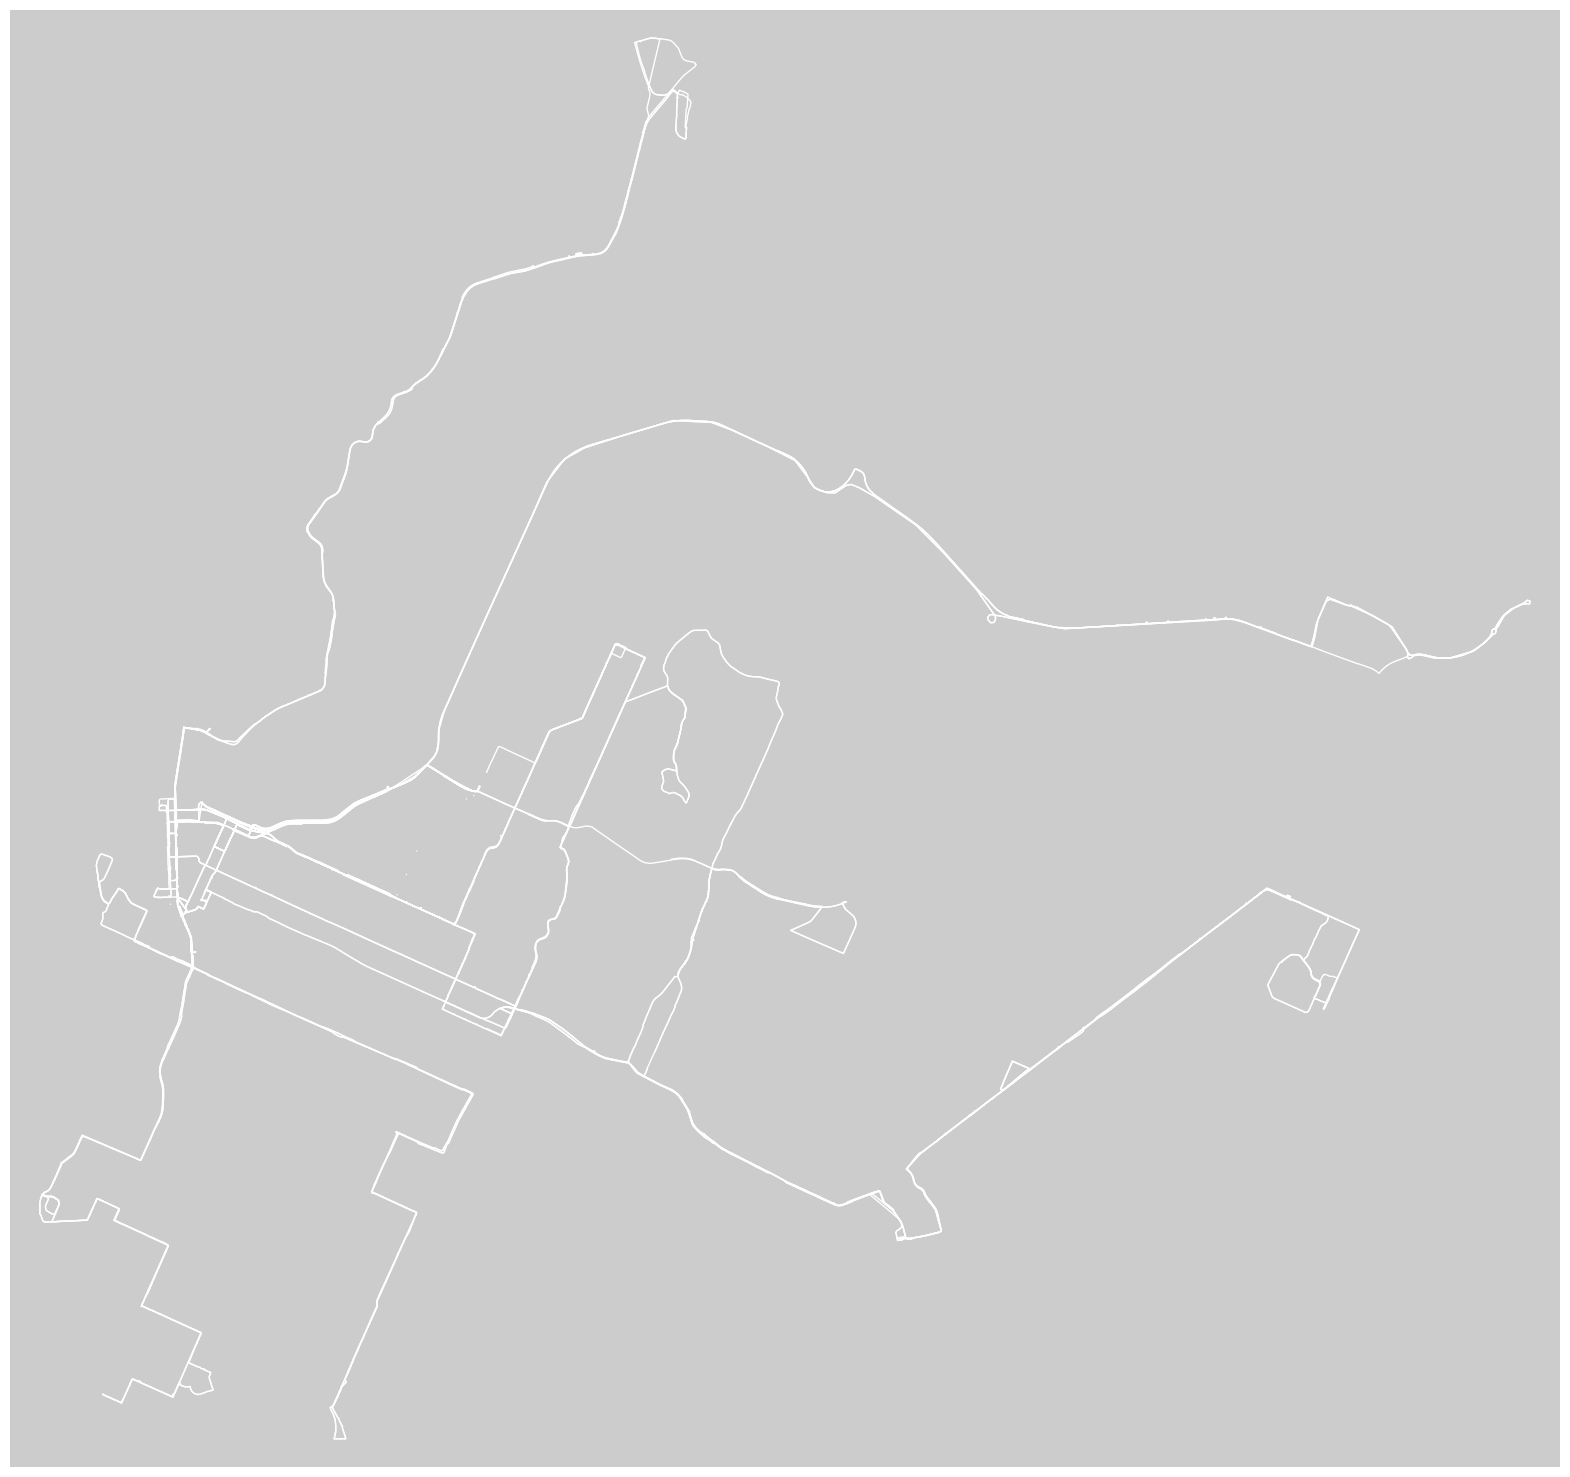

In [18]:
#graph_bus = load_feed_as_graph(feed);
mode = 'transit';
bgcolor = [0.8,0.8,0.8,1];
# %time fig, ax = ox.plot_graph(GRAPHS['drive'],bgcolor=bgcolor,node_size=1,figsize=(20,20),edge_color = [1,1,1],show=False,); #file_format='svg')
%time fig, ax = ox.plot_graph(GRAPHS[mode],bgcolor=bgcolor,node_size=1,figsize=(20,20),edge_color = [1,1,1],show=False,); #file_format='svg')

In [19]:
graph= GRAPHS['drive']

In [18]:
# edge = list(graph.edges)[0]
# print(edge)
# #print(graph.edges[node])

(73320087, 202711083, 0)


# LOADING POPULATION DATA (takes 1 min...)

In [ ]:
import pygris
import pandas as pd
import numpy as np
from shapely.geometry import Point
import geopandas as gpd

def generate_driver_dataframe(groups, start_time, end_time, am_capacity=8, wc_capacity=2):
    # Create a DataFrame with driver information
    driver_data = {
        'group': groups,
        'driver_start_time': [start_time] * len(groups),
        'driver_end_time': [end_time] * len(groups),
        'am_capacity': [am_capacity] * len(groups),
        'wc_capacity': [wc_capacity] * len(groups),
    }
    
    driver_df = pd.DataFrame(driver_data)
    return driver_df
def add_logistic_values (PRE, tag, DWT = 1, DWM = 0, DWC = 0, DWS = 0,
                         WWT = 1, WWM = 0, WWC = 0, WWS = 0,
                         TWT = 1 , TWM = 0, TWC = 0, TWS = 0, 
                         OWT = 1, OWM = 0, OWC = 0, OWS = 0)

            # Add fields for 'drive'
            PRE[tag]['drive_weight_time'] = DWT
            PRE[tag]['drive_weight_money'] = DWM
            PRE[tag]['drive_weight_conven'] = DWC
            PRE[tag]['drive_weight_switches'] = DWS

            # Add fields for 'walk'
            PRE[tag]['walk_weight_time'] = WWT
            PRE[tag]['walk_weight_money'] = WWM
            PRE[tag]['walk_weight_conven'] = WWC
            PRE[tag]['walk_weight_switches'] = WWS

            # Add fields for 'ondemand'
            PRE[tag]['ondemand_weight_time'] = TWT
            PRE[tag]['ondemand_weight_money'] = TWM
            PRE[tag]['ondemand_weight_conven'] = TWC
            PRE[tag]['ondemand_weight_switches'] = TWS

            # Add fields for 'transit'
            PRE[tag]['transit_weight_time'] = OWT
            PRE[tag]['transit_weight_money'] = OWM
            PRE[tag]['transit_weight_conven'] = OWC
            PRE[tag]['transit_weight_switches'] = OWS
            
            
            return PRE

def convert_csv_to_PRE_format(GRAPHS,VEHS, SEG_TYPES, minz, maxz, csv_file_path):
    
#     CSV has columns:
#     index
#     orig_lon,orig_lat : origin coordinates
#     dest_lon,dest_lat : destination coordinates 
#     take_car
#     take_transit
#     take_walk
#     take_ondemand
#     mass: population mass
# Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file_path)
    
            
    # Socio economic data path
    socio_economic_fp = 'data/census_data_hamilton/2021_census_tract_hamilton.geojson'
    # Reading the socio economic data
    socio_economic_df = gpd.read_file(socio_economic_fp)
    # Getting only the required columns
    socio_economic_df = socio_economic_df[['geometry','median_income_last12months']]
    
    NODES = {}

    NODES['orig'] = [];
    NODES['dest'] = [];
    NODES['delivery1'] = []; 
    NODES['delivery2'] = []; 
    NODES['delivery1_transit'] = [];
    NODES['delivery2_transit'] = [];
    NODES['drive_transit'] = [];

    LOCS = {};
    LOCS['orig'] = [];
    LOCS['dest'] = [];
    LOCS['delivery1'] = []
    LOCS['delivery2'] = []
    SIZES = {};
    # Initialize the PRE object
    PRE = {}
    home_locs = [];
    work_locs = [];
    home_sizes = {};
    work_sizes = {};
    
    # Convert the DataFrame to the PRE format
    for index, row in df.iterrows():
    
        tag = f"person{index}"
        take_car = row['take_car']
        take_transit = row['take_transit']
        take_walk = row['take_walk']
        take_ondemand = row['take_ondemand']
        pop = row['mass']
        orig_loc = np.array([row['orig_lon'], row['orig_lat']])
        dest_loc = np.array([row['dest_lon'], row['dest_lat']])
        
        #logic to assign the 'home_node' and 'work_node'.
        
        home_loc = orig_loc;    
        work_loc = dest_loc;
        
        VALS = np.abs(VEHS['lon']-home_loc[0])+np.abs(VEHS['lat']-home_loc[1]);
        mask1 = VALS == np.min(VALS);

        perc_wcars = list(VEHS[mask1]['percent_w_cars'])[0]
        perc_wnocars = list(VEHS[mask1]['percent_wout_cars'])[0]
        
        home_size = pop; 
        work_size = pop; 

        test1 = (maxz[0]>=home_loc[0]) and (maxz[1]>=home_loc[1]);
        test2 = (minz[0]<=home_loc[0]) and (minz[1]<=home_loc[1]);
        test3 = (maxz[0]>=work_loc[0]) and (maxz[1]>=work_loc[1]);
        test4 = (minz[0]<=work_loc[0]) and (minz[1]<=work_loc[1]);
        if test1 and test2 and test3 and test4:


            ##### Adding populations.... 

            #### CASE 1: If the population has a car
            if perc_wcars > 0.:
                people_tags.append(tag)
                PRE[tag] = {};

                PRE[tag]['orig_loc'] = home_loc
                PRE[tag]['dest_loc'] = work_loc;

                LOCS['orig'].append(home_loc);
                LOCS['dest'].append(work_loc);

                if compute_nodes:
                    
                    home_node = ox.distance.nearest_nodes(GRAPHS['drive'],home_loc[0],home_loc[1]);
                    work_node = ox.distance.nearest_nodes(GRAPHS['drive'], work_loc[0],work_loc[1]);

                    if home_node in home_sizes: home_sizes[home_node] = home_sizes[home_node] + home_size;
                    else: home_sizes[home_node] = home_size;
                    if work_node in work_sizes: work_sizes[work_node] = work_sizes[work_node] + work_size;
                    else: work_sizes[work_node] = work_size;

                    home_nodes.append(home_node);
                    work_nodes.append(work_node);
                    NODES['orig'].append(home_node);
                    NODES['dest'].append(work_node)

                    PRE[tag]['home_node'] = home_node;        
                    PRE[tag]['work_node'] = work_node;
                    PRE[tag]['take_car'] = take_car
                    PRE[tag]['take_transit'] = take_transit
                    PRE[tag][ 'take_ondemand'] = take_ondemand
                    PRE[tag]['take_walk'] = take_walk

                    PRE[tag]['pop'] = home_size*perc_wcars;



                samp = np.random.rand(1);
                if (samp < 0.3):
                    seg_types = SEG_TYPES['car_opt']
                    
                ## seg_types: list of different travel modes... 
                # [('drive',),
                #  ('ondemand',),
                #  ('walk','gtfs','walk'),
                #  ('walk','gtfs','ondemand'),
                #  ('ondemand','gtfs','walk'),
                #  ('ondemand','gtfs','ondemand')
                #  ];

                else: 
                    seg_types = SEG_TYPES['car_only'] #[('drive',)]

                PRE[tag]['seg_types'] = seg_types

            #### Case 2: If the population doesn't have a car. 
            if perc_wnocars > 0.:
                people_tags.append(tag)
                PRE[tag] = {};

                PRE[tag]['orig_loc'] = home_loc
                PRE[tag]['dest_loc'] = work_loc;

                LOCS['orig'].append(home_loc);
                LOCS['dest'].append(work_loc);


                if compute_nodes:
                    home_node = ox.distance.nearest_nodes(GRAPHS['drive'],home_loc[0],home_loc[1]);
                    work_node = ox.distance.nearest_nodes(GRAPHS['drive'], work_loc[0],work_loc[1]);

                    if home_node in home_sizes: home_sizes[home_node] = home_sizes[home_node] + home_size;
                    else: home_sizes[home_node] = home_size;
                    if work_node in work_sizes: work_sizes[work_node] = work_sizes[work_node] + work_size;
                    else: work_sizes[work_node] = work_size;

                    home_nodes.append(home_node);
                    work_nodes.append(work_node);
                    NODES['orig'].append(home_node);
                    NODES['dest'].append(work_node)
                    
                    PRE[tag]['home_node'] = home_node;        
                    PRE[tag]['work_node'] = work_node;

                    PRE[tag]['pop'] = home_size*perc_wnocars;
                    PRE[tag]['take_car'] = take_car
                    PRE[tag]['take_transit'] = take_transit
                    PRE[tag][ 'take_ondemand'] = take_ondemand
                    PRE[tag]['take_walk'] = take_walk
                    
                seg_types = SEG_TYPES['car_no']
                ## seg_types: list of different travel modes... 
                # [('drive',),
                #  ('ondemand',),
                #  ('walk','gtfs','walk'),
                #  ('walk','gtfs','ondemand'),
                #  ('ondemand','gtfs','walk'),
                #  ('ondemand','gtfs','ondemand')
                #  ];   
        # Getting the latitude and longitude value
        lat = PRE[tag]['orig_loc'][1]
        long = PRE[tag]['orig_loc'][0]

        # Create a pandas DataFrame with a single row
        df = pd.DataFrame({'Latitude': [lat], 'Longitude': [long]})

        # Convert the pandas DataFrame into a GeoPandas DataFrame with a Point geometry
        geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]

        # Converting to Geopandas 
        gdf = gpd.GeoDataFrame(df, geometry=geometry)

        # Perform a spatial join between the MultiPolygon GeoPandas DataFrame and the Point GeoPandas DataFrame
        result = gpd.sjoin(gdf, socio_economic_df, how="inner", op='intersects')
        result.reset_index(drop=True,inplace=True)

        # Storing the median income - have a try and except block incase points don't lie in the census data
        try:
            PRE[tag]['median_income'] = result['median_income_last12months'][0]
        except:
            pass

        #Weights assigned to convenience and number of switches in Drive mode.
        DWC = DWS = 0
        #Weights assigned to convenience and number of switches in Walk mode.
        WWC = WWS = 0
        #Weight assigned to convenience in Transit mode.
        TWC = 0
        #Weight assigned according to the number of switches in Transit mode. Upper bound on the number of transfers --> 7 (5 bus transfers and 2 otherwise)
        TWS = [  0.0,
                 0.14285714285714285,
                 0.2857142857142857,
                 0.42857142857142855,
                 0.5714285714285714,
                 0.7142857142857143,
                 0.8571428571428571,
                 1.0 ]
        
        #Weight assigned to convenience in Ondemand mode.
        OWC = 0
        #Weight assigned according to the number of transfers in Ondemand mode. Upper bound on the number of transfers --> 7 (5 bus transfers and 2 otherwise)
        OWS= [   0.0,
                 0.14285714285714285,
                 0.2857142857142857,
                 0.42857142857142855,
                 0.5714285714285714,
                 0.7142857142857143,
                 0.8571428571428571,
                 1.0 ]
        
        #Weight assigned to time in all modes.
        DWT = WWT = TWT = OWT = 1
        #Weight assigned to money as a function of income for all modes.
        DWM = WWM = TWM = OWM =  PRE[tag]['median_income']/(52*7*24*60*60)

        
        #Adding logistic choice weights to PRE object.
        PRE = add_logistic_values (PRE, tag, DWT, DWM, DWC, DWS,
                             WWT , WWM, WWC, WWS,
                             TWT, TWM, TWC, TWS, 
                             OWT, OWM, OWC, OWS)


    SIZES['home_sizes'] = home_sizes
    SIZES['work_sizes'] = work_sizes

    
    return PRE, NODES, LOCS, SIZES, people_tags



# def generate_input(person_tag, mass, orig_loc, dest_loc, leave_time_start, leave_time_end, arrival_time_start, arrival_time_end, take_car, take_transit, take_walk, take_ondemand, has_wheelchair):
#     data_dict = {
#         'Person tag': person_tag,
#         'mass': mass,
#         'orig_loc': orig_loc,
#         'dest_loc': dest_loc,
#         'leave_time_start': leave_time_start,
#         'leave_time_end': leave_time_end,
#         'arrival_time_start': arrival_time_start,
#         'arrival_time_end': arrival_time_end,
#         'take_car': take_car,
#         'take_transit': take_transit,
#         'take_walk': take_walk,
#         'take_ondemand': take_ondemand,
#         'has_wheelchair': has_wheelchair
#     }

#     df = pd.DataFrame([data_dict])    
#     return df

# def convert_df_to_pre(df):
#     pre_df = df.rename(columns={
#         'Person tag': 'p_tag',
#         'mass': 'people_count',

#     })
#     return pre_df


# def convert_list_to_pre(list_of_dicts):
#     pre_list = []
#     for d in list_of_dicts:
#         pre_dict = {
#             'p_tag': d['Person tag'],
#             'people_count': d['mass'],

#         }
#         pre_list.append(pre_dict)
#     return pre_list

def initialize_parameters(GRAPHS, cutoff_bnds=[], params={}):
    
    pop_cutoff = params.get('pop_cutoff', 30)
    OD_version = params.get('OD_version', 'basic')
    SEG_TYPES = params['SEG_TYPES']
    zzgraph = GRAPHS['all']
    
    temp = [Point(n['x'],n['y']) for i, n in zzgraph.nodes(data=True)]
    temp2 = np.array([[n['x'],n['y']] for i, n in zzgraph.nodes(data=True)])
        
    return pop_cutoff, OD_version, SEG_TYPES, zzgraph, temp, temp2


def calculate_graph_boundary(temp, temp2):
    
    minz, maxz = np.min(temp2, axis=0), np.max(temp2, axis=0)
    dfz = maxz - minz
    centerz = minz + 0.5 * dfz
    
    pts_offset = 0.5 * np.array([[dfz[0], dfz[1]], [-dfz[0], dfz[1]], [-dfz[0], -dfz[1]], [dfz[0], -dfz[1]]])
    pts = pts_offset + centerz
    points = [Point(zz[0], zz[1]) for zz in pts]
    temp.extend(points)

    graph_boundary = gpd.GeoSeries(temp).unary_union.convex_hull
    cornersz = np.array([[maxz[0], maxz[1]], [minz[0], maxz[1]], [minz[0], minz[1]], [maxz[0], minz[1]]])
    
    divx = 40
    divy = int(divx * (dfz[1] / dfz[0]))
    ptBnds = ptsBoundary(cornersz, [divx, divy, divx, divy])
    
    return graph_boundary, cornersz, ptBnds, minz, maxz


def load_data():
    # Reading in the LODES dataset
    lodes_data = pd.read_parquet('data/pop/lodes_combinations_upd.parquet')
    
    # Fetching block group definitions
    BGDEFS = pygris.block_groups(state="TN", county="Hamilton", cb=True, cache=True)
    BGDEFS['pt'] = BGDEFS['geometry'].representative_point()
    BGDEFS['lon'] = BGDEFS['pt'].x
    BGDEFS['lat'] = BGDEFS['pt'].y
    
    # Reading American Commuter Survey dataset 
    column_mapping = {
        'GEO_ID': 'AFFGEOID',
        'B992512_001E': 'workers',
        'B992512_002E': 'wout_cars',
        'B992512_003E': 'w_cars'
    }
    drop_columns = ['B992512_001EA', 'B992512_002EA', 'B992512_003EA', 'Unnamed: 8']
    
    VEHS = pd.read_csv('data/pop/ACSDT5Y2020.B992512-Data.csv')
    VEHS = VEHS.rename(columns=column_mapping).drop(columns=drop_columns)
    VEHS = VEHS.drop([0])

    # Compute the percentage of workers with and without cars
    VEHS['workers'] = pd.to_numeric(VEHS['workers'], errors='coerce')
    VEHS['wout_cars'] = pd.to_numeric(VEHS['wout_cars'], errors='coerce')
    VEHS['w_cars'] = pd.to_numeric(VEHS['w_cars'], errors='coerce')
    VEHS['percent_w_cars'] = VEHS['w_cars'] / VEHS['workers']
    VEHS['percent_wout_cars'] = VEHS['wout_cars'] / VEHS['workers']
    
    # Merge the datasets
    VEHS = VEHS.merge(BGDEFS, how='left', on='AFFGEOID')
    
    return lodes_data, BGDEFS, VEHS

def filter_data(asdf0, pop_cutoff, cutoff_bnds, minz, maxz, params):
    
    # Filter out population members outside a specified bounding box
    if cutoff_bnds:
        bot_bnd, top_bnd = cutoff_bnds
        mask = (
            (asdf0['home_loc_lon'].between(bot_bnd[0], top_bnd[0])) &
            (asdf0['home_loc_lat'].between(bot_bnd[1], top_bnd[1])) &
            (asdf0['work_loc_lon'].between(bot_bnd[0], top_bnd[0])) &
            (asdf0['work_loc_lat'].between(bot_bnd[1], top_bnd[1]))
        )
        asdf0 = asdf0[mask]
        
    box = [minz[0], maxz[0], minz[1], maxz[1]]
    asdf2 = filterODs(asdf0, box, eps=params['eps_filterODs'])
    
    # Mask based on population criteria
    mask = (asdf2['pop'] > pop_cutoff) | (asdf2['pop'] < -1)
    asdf = asdf2[mask]
    
    # Optional plotting and printing
    plt.plot(asdf['pop'])
    total_pop = asdf['pop'].sum()
    print(f'total pop is {total_pop} out of {asdf2["pop"].sum()}')
    num_people = len(asdf)
    print(f'number of agents: {num_people}')
    
    return asdf

def process_basic_OD_version(asdf, VEHS, GRAPHS, SEG_TYPES, minz, maxz):
    
        locs = [];
        for i,node in enumerate(GRAPHS['drive'].nodes):
            NODE = GRAPHS['drive'].nodes[node];
            lon = NODE['x']; lat = NODE['y']
            locs.append([lon,lat]);
        locs = np.array(locs);

        if len(cutoff_bnds)>0:
            minz = cutoff_bnds[0];
            maxz = cutoff_bnds[1];
        else:
            minz = np.min(locs,0)
            maxz = np.max(locs,0)

        NODES = {}

        NODES['orig'] = [];#sample(list(sample_graph.nodes()), num_people)
        NODES['dest'] = [];#sample(list(sample_graph.nodes()), num_targets)
        NODES['delivery1'] = []; #sample(list(sample_graph.nodes()), num_deliveries)
        NODES['delivery2'] = []; #sample(list(sample_graph.nodes()), num_deliveries)
        NODES['delivery1_transit'] = [];
        NODES['delivery2_transit'] = [];
        NODES['drive_transit'] = [];

        LOCS = {};
        LOCS['orig'] = [];
        LOCS['dest'] = [];
        LOCS['delivery1'] = []
        LOCS['delivery2'] = []
        SIZES = {};

        home_locs = [];
        work_locs = [];
        home_sizes = {};
        work_sizes = {};

        sample_graph = GRAPHS['drive'];

        PRE = {};
        compute_nodes = True;
        if compute_nodes:
            home_nodes = []
            work_nodes = []

            people_tags = [];
        i1 = 0;
        i2 = 0;
        i3 = 0;
        while i1<len(asdf.index):
            i = i2;
            samp = asdflist[i1];  # grabbing appropriate index of the dataframe... 
                
            
            ### pulling out information from the data frame... 
            hlon = asdf['hx'].loc[samp]  # home longitude
            hlat = asdf['hy'].loc[samp]  # home latitude...
            wlon = asdf['wx'].loc[samp]  # work longitude
            wlat = asdf['wy'].loc[samp]
            home_loc = np.array([hlon,hlat]); # locations...  
            work_loc = np.array([wlon,wlat]);


            #### figuring out what percentage of the population has cars or not based on ACS given home location
        	### VEHS has the info the ACS... driving information.... 
        	#### for a population... what region are they in so which driving statistics apply... 
            VALS = np.abs(VEHS['lon']-hlon)+np.abs(VEHS['lat']-hlat);
            mask1 = VALS == np.min(VALS); ### find closest region in the VEHS data (so apply that driving statistic)
            perc_wcars = list(VEHS[mask1]['percent_w_cars'])[0]
            perc_wnocars = list(VEHS[mask1]['percent_wout_cars'])[0]



        
            home_size = asdf['pop'].loc[samp]
            work_size = asdf['pop'].loc[samp]
            
            ################################################################
            test1 = (maxz[0]>=home_loc[0]) and (maxz[1]>=home_loc[1]);
            test2 = (minz[0]<=home_loc[0]) and (minz[1]<=home_loc[1]);
            test3 = (maxz[0]>=work_loc[0]) and (maxz[1]>=work_loc[1]);
            test4 = (minz[0]<=work_loc[0]) and (minz[1]<=work_loc[1]);
            
            if True: 
                
                #### Case 1: Adding a population with cars.
                if perc_wcars > 0.:

                	
                    if np.mod(i2,200)==0: print(i2) ### just shows how fast the loop is running... 


                    tag = 'person'+str(i2); ### creating a poulation tag... 
                    people_tags.append(tag)
                    PRE[tag] = {}; ## initializing 
                
                	### adding location information.... 
                    PRE[tag]['orig_loc'] = home_loc; 
                    PRE[tag]['dest_loc'] = work_loc;
                    LOCS['orig'].append(home_loc);  
                    LOCS['dest'].append(work_loc);
                    

                    #### adding whether or not they have a car... 
                    PRE[tag]['take_car'] = 1.;
                    PRE[tag]['take_transit'] = 1.;
                    PRE[tag]['take_ondemand'] = 1.;        
                    PRE[tag]['take_walk'] = 1.;
            
                                      
                    if compute_nodes:
                    	### finding the nearest nodes within the driving network... 
                        home_node = ox.distance.nearest_nodes(GRAPHS['drive'],home_loc[0],home_loc[1]);
                        work_node = ox.distance.nearest_nodes(GRAPHS['drive'], work_loc[0],work_loc[1]);
                        

                        #### size of the population.... 
                        if home_node in home_sizes: home_sizes[home_node] = home_sizes[home_node] + home_size;
                        else: home_sizes[home_node] = home_size;
                        if work_node in work_sizes: work_sizes[work_node] = work_sizes[work_node] + work_size;
                        else: work_sizes[work_node] = work_size;
                        

                        ### adding nodes to different lists/objects... 
                        home_nodes.append(home_node);
                        work_nodes.append(work_node);
                        NODES['orig'].append(home_node);
                        NODES['dest'].append(work_node)
                        
                        PRE[tag]['home_node'] = home_node;        
                        PRE[tag]['work_node'] = work_node;
                        

                        #### adding the population size to the objects... 
                        PRE[tag]['pop'] = home_size*perc_wcars;

                    ##### adding specific trip types... 
                    # input from SEG_TYPES is generated using the function 
                    # generate_segtypes
                    samp = np.random.rand(1);  # extra sampling to change the percentage... 
                    if (samp < 0.3):
                        seg_types = SEG_TYPES['car_opt']

                    else: 
                        seg_types = SEG_TYPES['car_only'] #[('drive',)]

                    PRE[tag]['seg_types'] = seg_types

                    ## seg_types: list of different travel modes... 
                    # [('drive',),
                    #  ('ondemand',),
                    #  ('walk','gtfs','walk'),
                    #  ('walk','gtfs','ondemand'),
                    #  ('ondemand','gtfs','walk'),
                    #  ('ondemand','gtfs','ondemand')
                    #  ];
                    i2 = i2 + 1;




                #### Case 2: Adding a population without cars.
        
                if perc_wnocars > 0.:
                	
                    
                    if np.mod(i2,200)==0: print(i2)
                    tag = 'person'+str(i2);
                    people_tags.append(tag)
                    PRE[tag] = {};
                
                    PRE[tag]['orig_loc'] = home_loc
                    PRE[tag]['dest_loc'] = work_loc;
                    
                    LOCS['orig'].append(home_loc);
                    LOCS['dest'].append(work_loc);
                    
                    PRE[tag]['take_car'] = 0.;
                    PRE[tag]['take_transit'] = 1.;
                    PRE[tag]['take_ondemand'] = 1.;        
                    PRE[tag]['take_walk'] = 1.;
                        
                    if compute_nodes:
                        home_node = ox.distance.nearest_nodes(GRAPHS['drive'],home_loc[0],home_loc[1]);
                        work_node = ox.distance.nearest_nodes(GRAPHS['drive'], work_loc[0],work_loc[1]);
                        
                        if home_node in home_sizes: home_sizes[home_node] = home_sizes[home_node] + home_size;
                        else: home_sizes[home_node] = home_size;
                        if work_node in work_sizes: work_sizes[work_node] = work_sizes[work_node] + work_size;
                        else: work_sizes[work_node] = work_size;
                        
                        home_nodes.append(home_node);
                        work_nodes.append(work_node);
                        NODES['orig'].append(home_node);
                        NODES['dest'].append(work_node)
                        
                        PRE[tag]['home_node'] = home_node;        
                        PRE[tag]['work_node'] = work_node;
                        
                        PRE[tag]['pop'] = home_size*perc_wnocars;


                    seg_types = SEG_TYPES['car_no']
                    ## seg_types: list of different travel modes... 
                    # [('drive',),
                    #  ('ondemand',),
                    #  ('walk','gtfs','walk'),
                    #  ('walk','gtfs','ondemand'),
                    #  ('ondemand','gtfs','walk'),
                    #  ('ondemand','gtfs','ondemand')
                    #  ];             
                    PRE[tag]['seg_types'] = seg_types
                    i2 = i2 + 1;
                    
            i1 = i1 + 1;
        
        SIZES['home_sizes'] = home_sizes
        SIZES['work_sizes'] = work_sizes

        
        return PRE, NODES, LOCS, SIZES, people_tags

def process_gaussian_OD_version(params, VEHS, GRAPHS, SEG_TYPES, minz, maxz):
            
        locs = [];
        for i,node in enumerate(GRAPHS['drive'].nodes):
            NODE = GRAPHS['drive'].nodes[node];
            lon = NODE['x']; lat = NODE['y']
            locs.append([lon,lat]);
        locs = np.array(locs);

        if len(cutoff_bnds)>0:
            minz = cutoff_bnds[0];
            maxz = cutoff_bnds[1];
        else:
            minz = np.min(locs,0)
            maxz = np.max(locs,0)

        NODES = {}

        NODES['orig'] = [];#sample(list(sample_graph.nodes()), num_people)
        NODES['dest'] = [];#sample(list(sample_graph.nodes()), num_targets)
        NODES['delivery1'] = []; #sample(list(sample_graph.nodes()), num_deliveries)
        NODES['delivery2'] = []; #sample(list(sample_graph.nodes()), num_deliveries)
        NODES['delivery1_transit'] = [];
        NODES['delivery2_transit'] = [];
        NODES['drive_transit'] = [];

        LOCS = {};
        LOCS['orig'] = [];
        LOCS['dest'] = [];
        LOCS['delivery1'] = []
        LOCS['delivery2'] = []
        SIZES = {};

        home_locs = [];
        work_locs = [];
        home_sizes = {};
        work_sizes = {};

        sample_graph = GRAPHS['drive'];

        PRE = {};
        compute_nodes = True;
        if compute_nodes:
            home_nodes = []
            work_nodes = []

            people_tags = [];
        i1 = 0;
        i2 = 0;
        orig_locs = np.array([0,2])
        dest_locs = np.array([0,2])

        ###### loading the gaussian distribution info 
        ### sampling from distributions
        
        for kk,stats in enumerate(params['gauss_stats']):
            stats
            num_pops = stats['num']
            orig_mean = stats['origs']['mean'] 
            dest_mean = stats['dests']['mean'] 
            orig_cov = stats['origs']['cov'] 
            dest_cov = stats['dests']['cov']
            pop = stats['pop']
            
            ### sampled origin and destination locations.... 
            orig_locs = np.vstack([orig_locs,np.random.multivariate_normal(orig_mean, orig_cov, size=num_pops)]);
            dest_locs = np.vstack([dest_locs,np.random.multivariate_normal(dest_mean, dest_cov, size=num_pops)]);


        # loop through each origin location... 
        for i,orig_loc in enumerate(orig_locs):
            
            dest_loc = dest_locs[i]
            home_loc = orig_loc; #np.array([hlon,hlat]);    
            work_loc = dest_loc; #np.array([wlon,wlat]);
        
            VALS = np.abs(VEHS['lon']-home_loc[0])+np.abs(VEHS['lat']-home_loc[1]);
            mask1 = VALS == np.min(VALS);

            perc_wcars = list(VEHS[mask1]['percent_w_cars'])[0]
            perc_wnocars = list(VEHS[mask1]['percent_wout_cars'])[0]
        
            home_size = pop; #['origs']['cov']; #1.;#asdf['pop'].loc[samp]
            work_size = pop; #origs']['cov']; #1.;#asdf['pop'].loc[samp]
            
            
            ################################################################
            test1 = (maxz[0]>=home_loc[0]) and (maxz[1]>=home_loc[1]);
            test2 = (minz[0]<=home_loc[0]) and (minz[1]<=home_loc[1]);
            test3 = (maxz[0]>=work_loc[0]) and (maxz[1]>=work_loc[1]);
            test4 = (minz[0]<=work_loc[0]) and (minz[1]<=work_loc[1]);
            if test1 and test2 and test3 and test4:
                

            	##### Adding populations.... 

                #### CASE 1: If the population has a car
                if perc_wcars > 0.:
                    if np.mod(i2,200)==0: print(i2)
                    tag = 'person'+str(i2);
                    people_tags.append(tag)
                    PRE[tag] = {};
                
                    PRE[tag]['orig_loc'] = home_loc
                    PRE[tag]['dest_loc'] = work_loc;
                    
                    LOCS['orig'].append(home_loc);
                    LOCS['dest'].append(work_loc);
                    
                    PRE[tag]['take_car'] = 1.;
                    PRE[tag]['take_transit'] = 1.;
                    PRE[tag]['take_ondemand'] = 1.;        
                    PRE[tag]['take_walk'] = 1.;
            
                    if compute_nodes:
                        home_node = ox.distance.nearest_nodes(GRAPHS['drive'],home_loc[0],home_loc[1]);
                        work_node = ox.distance.nearest_nodes(GRAPHS['drive'], work_loc[0],work_loc[1]);
                        
                        if home_node in home_sizes: home_sizes[home_node] = home_sizes[home_node] + home_size;
                        else: home_sizes[home_node] = home_size;
                        if work_node in work_sizes: work_sizes[work_node] = work_sizes[work_node] + work_size;
                        else: work_sizes[work_node] = work_size;
                        
                        home_nodes.append(home_node);
                        work_nodes.append(work_node);
                        NODES['orig'].append(home_node);
                        NODES['dest'].append(work_node)
                        
                        PRE[tag]['home_node'] = home_node;        
                        PRE[tag]['work_node'] = work_node;
                        
                        PRE[tag]['pop'] = home_size*perc_wcars;



                    samp = np.random.rand(1);
                    if (samp < 0.3):
                        seg_types = SEG_TYPES['car_opt']
                    ## seg_types: list of different travel modes... 
                    # [('drive',),
                    #  ('ondemand',),
                    #  ('walk','gtfs','walk'),
                    #  ('walk','gtfs','ondemand'),
                    #  ('ondemand','gtfs','walk'),
                    #  ('ondemand','gtfs','ondemand')
                    #  ];

                    else: 
                        seg_types = SEG_TYPES['car_only'] #[('drive',)]

                    PRE[tag]['seg_types'] = seg_types
            
                    i2 = i2 + 1;




                #### Case 2: If the population doesn't have a car. 
                if perc_wnocars > 0.:
                    
                    if np.mod(i2,200)==0: print(i2)


                    #### creating a new population... 
                    tag = 'person'+str(i2);
                    people_tags.append(tag)
                    PRE[tag] = {};
                
                    PRE[tag]['orig_loc'] = home_loc
                    PRE[tag]['dest_loc'] = work_loc;
                    
                    LOCS['orig'].append(home_loc);
                    LOCS['dest'].append(work_loc);
                    
                    PRE[tag]['take_car'] = 0.;
                    PRE[tag]['take_transit'] = 1.;
                    PRE[tag]['take_ondemand'] = 1.;        
                    PRE[tag]['take_walk'] = 1.;
                        
                    if compute_nodes:
                        home_node = ox.distance.nearest_nodes(GRAPHS['drive'],home_loc[0],home_loc[1]);
                        work_node = ox.distance.nearest_nodes(GRAPHS['drive'], work_loc[0],work_loc[1]);
                        
                        if home_node in home_sizes: home_sizes[home_node] = home_sizes[home_node] + home_size;
                        else: home_sizes[home_node] = home_size;
                        if work_node in work_sizes: work_sizes[work_node] = work_sizes[work_node] + work_size;
                        else: work_sizes[work_node] = work_size;
                        
                        home_nodes.append(home_node);
                        work_nodes.append(work_node);
                        NODES['orig'].append(home_node);
                        NODES['dest'].append(work_node)
                        
                        PRE[tag]['home_node'] = home_node;        
                        PRE[tag]['work_node'] = work_node;
                        
                        PRE[tag]['pop'] = home_size*perc_wnocars;


                    seg_types = SEG_TYPES['car_no']
                    ## seg_types: list of different travel modes... 
                    # [('drive',),
                    #  ('ondemand',),
                    #  ('walk','gtfs','walk'),
                    #  ('walk','gtfs','ondemand'),
                    #  ('ondemand','gtfs','walk'),
                    #  ('ondemand','gtfs','ondemand')
                    #  ];             
                    PRE[tag]['seg_types'] = seg_types
                    i2 = i2 + 1;
                    
            i1 = i1 + 1;
        
        SIZES['home_sizes'] = home_sizes
        SIZES['work_sizes'] = work_sizes

        return PRE, NODES, LOCS, SIZES, people_tags

def setup_ondemand_service(PRE, NODES, LOCS, SIZES, GRAPHS, params, people_tags):
    
    start_time = time.time()
    print('starting delivery1 sources...')
    for i,node in enumerate(NODES['delivery1']):
        if np.mod(i,200)==0: print(i)
        addNodeToDF(node,'drive',GRAPHS,NDF)
        
    print('starting delivery2 sources...')
    for i,node in enumerate(NODES['delivery2']):
        if np.mod(i,200)==0: print(i)
        addNodeToDF(node,'drive',GRAPHS,NDF)
            
    
            
    end_time = time.time()
    print('time to create nodes...: ',end_time-start_time)
    num_people = len(people_tags);
    num_targets = num_people;

    if 'num_deliveries' in params:
        num_deliveries = params['num_deliveries']['delivery1'];
        num_deliveries2 = params['num_deliveries']['delivery2'];
    else:
        num_deliveries =  int(num_people/10);
        num_deliveries2 = int(num_people/10);


    ##### k-means clustering of the population locations to see where the different ondemand vehicles should go
    ### CHANGED TO RUN FOR PILOT REGION....
    node_group = NODES['orig'] + NODES['dest']
    out = kmeans_nodes(num_deliveries,'ondemand',GRAPHS,node_group); 
    LOCS['delivery1'] = out['centers']
    out = kmeans_nodes(num_deliveries,'ondemand',GRAPHS,node_group); 
    LOCS['delivery2'] = out['centers']
    
    
    for i,loc in enumerate(LOCS['delivery1']):
        NODES['delivery1'].append(ox.distance.nearest_nodes(GRAPHS['ondemand'],loc[0],loc[1]));
    for i,loc in enumerate(LOCS['delivery2']):
        NODES['delivery2'].append(ox.distance.nearest_nodes(GRAPHS['ondemand'],loc[0],loc[1]));
    bus_graph = GRAPHS['bus_graph_wt'];
    delivery_transit_nodes = sample(list(bus_graph.nodes()), num_deliveries2)
    end_time = time.time();
    print('time to setup origins & dests: ',end_time - start_time)
    
    return PRE, NODES, LOCS, SIZES

def SETUP_POPULATIONS_CHATTANOOGA(GRAPHS, cutoff_bnds=[], params={}):
    
    pop_cutoff, OD_version, SEG_TYPES, zzgraph, temp, temp2 = initialize_parameters(GRAPHS, cutoff_bnds, params)
    graph_boundary, cornersz, ptBnds, minz,maxz = calculate_graph_boundary(temp, temp2)
    asdf0, BGDEFS, VEHS = load_data()

    
    if OD_version == 'custom':
        PRE, NODES, LOCS, SIZES, people_tags = convert_csv_to_PRE_format(GRAPHS,VEHS, SEG_TYPES, minz, maxz, csv_file_path)
    if OD_version == 'basic':
        asdf = filter_data(asdf0, pop_cutoff, cutoff_bnds, minz, maxz, params)
        PRE, NODES, LOCS, SIZES, people_tags = process_basic_OD_version(asdf, VEHS, GRAPHS, SEG_TYPES, minz, maxz)
        
    elif OD_version == 'gauss':
        PRE, NODES, LOCS, SIZES, people_tags = process_gaussian_OD_version(params, VEHS, GRAPHS, SEG_TYPES, minz, maxz)

    PRE, NODES, LOCS, SIZES = setup_ondemand_service(PRE, NODES, LOCS, SIZES, GRAPHS, params, people_tags)
    
    return {'PRE': PRE, 'NODES': NODES, 'LOCS': LOCS, 'SIZES': SIZES, 'VEHS': VEHS}
                

Using the default year of 2021
Using FIPS code '47' for input 'TN'
Using FIPS code '065' for input 'Hamilton'
279
cutting off shit...
1000
2000
3000
total pop is 1214.0 out of 4411.0
number of agents:  431
431
0
200
400
600
starting delivery1 sources...
starting delivery2 sources...
time to create nodes...:  1.0967254638671875e-05
time to setup origins & dests:  1.387249231338501


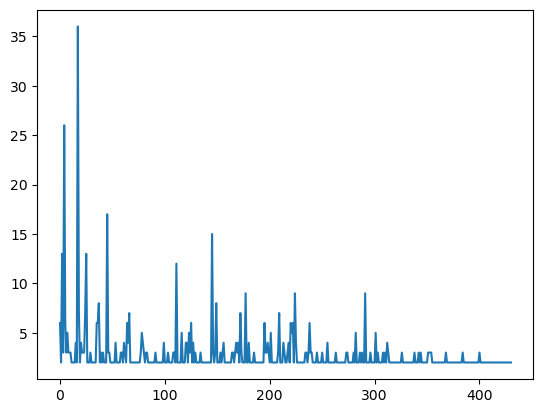

In [6]:

params = {'pop_cutoff':1}
params['SEG_TYPES'] = generate_segtypes('reg6') # reg1,reg2,bg


cent_pt = np.array(center_point)
dest_shift = np.array([0.001,-0.000]);
orig_shift = np.array([0.022,-0.04]);
orig_shift2 = np.array([-0.015,-0.042]);



generateGauss 


thd = 0.3; tho = -0.0; tho2 = -0.0;
Rd = np.array([[np.cos(thd),-np.sin(thd)],[np.sin(thd),np.cos(thd)]]);
Ro = np.array([[np.cos(tho),-np.sin(tho)],[np.sin(tho),np.cos(tho)]]);
Ro2 = np.array([[np.cos(tho2),-np.sin(tho2)],[np.sin(tho2),np.cos(tho2)]]);
COVd  = np.diag([0.00002,0.00002]);
COVo  = np.diag([0.00002,0.00008]);
COVo2 = np.diag([0.00002,0.00008]);
# COVd  = np.diag([0.000002,0.000002]);
# COVo  = np.diag([0.000002,0.000002]);
# COVo2 = np.diag([0.000002,0.000002]);
COVd = Rd@COVd@Rd.T
COVo = Ro@COVo@Ro.T
COVo2 = Ro2@COVo2@Ro2.T


params['OD_version'] = 'gauss';
params['gauss_stats'] = [{'num':200,'pop':60,'dests':{'mean':cent_pt+dest_shift,'cov':COVd},
                         'origs':{'mean':cent_pt+orig_shift,'cov':COVo}},
                         {'num':200,'pop':60,'dests':{'mean':cent_pt+dest_shift,'cov':COVd},
                         'origs':{'mean':cent_pt+orig_shift2,'cov':COVo2}}]

params['num_deliveries'] = {'delivery1':40,'delivery2':40}

params['eps_filterODs'] = 0.001
cutoff_bnds = bnds;
# cutoff_bnds = [];
OUT = SETUP_POPULATIONS_CHATTANOOGA(GRAPHS,cutoff_bnds = cutoff_bnds, params=params);
PRE = OUT['PRE'];
NODES = OUT['NODES']; LOCS = OUT['LOCS']; SIZES = OUT['SIZES']; 
VEHS = OUT['VEHS']

# ... plotting...(takes a few secs...)

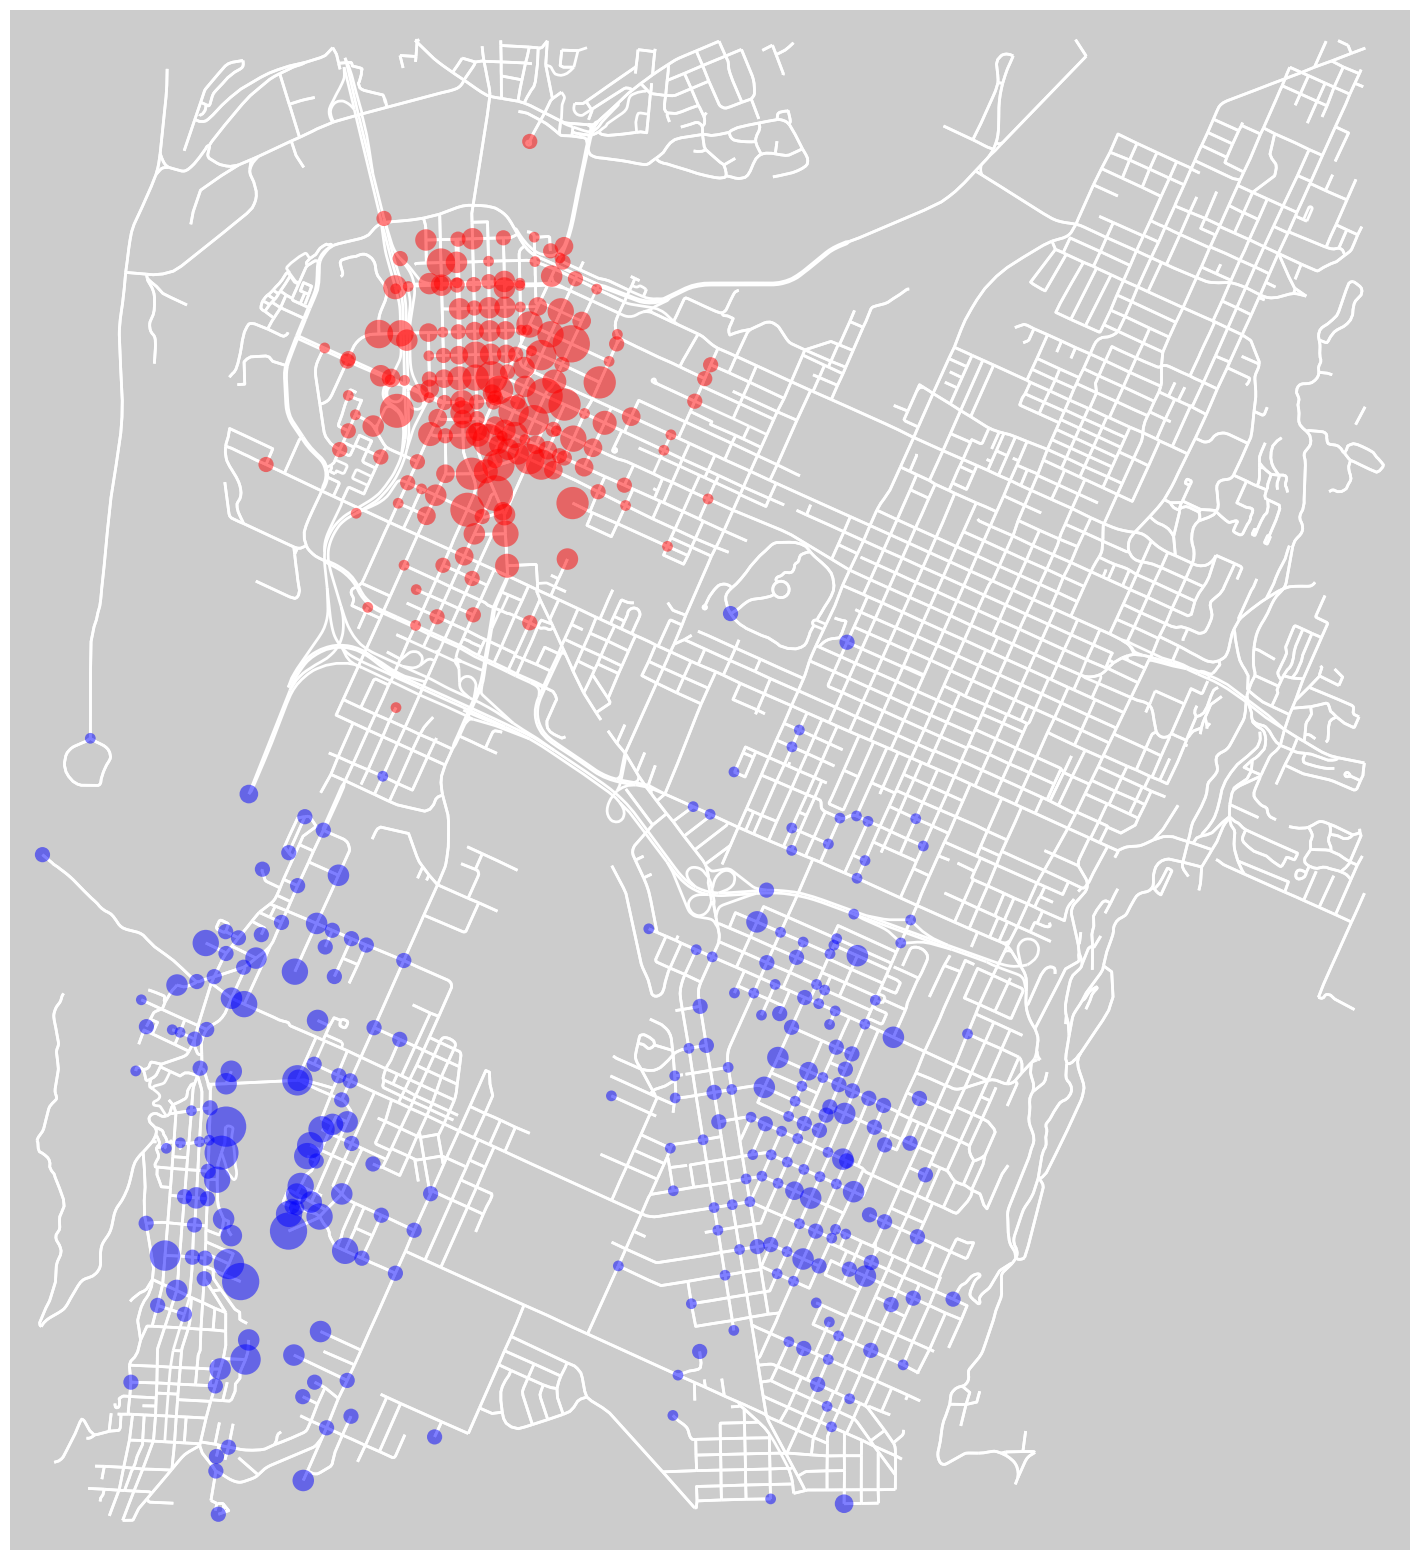

In [7]:
plotODs(GRAPHS,SIZES,NODES,scale=1.)

# SETUP NODES DATAFRAME (takes 10 min...)

In [8]:
from multimodal_functions import * 

# ndfs_to_rerun = ['gtfs','transit','delivery1','delivery2','source','target'];
ndfs_to_rerun = ['delivery1','delivery2','source','target'];
NDF = SETUP_NODESDF_CHATTANOOGA(GRAPHS,NODES,NDF=NDF,ndfs_to_rerun=ndfs_to_rerun)
#BUS_STOP_NODES = INITIALIZING_BUSSTOPCONVERSION_CHATTANOOGA(GRAPHS);
BUS_STOP_NODES = {};

time to create nodes...:  2.1457672119140625e-06
starting delivery1 sources...
0
starting delivery2 sources...
0
starting source nodes...
0
200
400
600
starting target nodes...
0
200
400
600
time to create nodes...:  82.09275007247925


In [29]:
print(NDF['drive'])

                   drive          walk transit     ondemand  gtfs
drive2                                                           
202596774.0  202596774.0  5.006183e+09      12  202596774.0    12
202596774.0  202596774.0  2.025968e+08     166  202596774.0   166
202596774.0  202596774.0  6.970033e+09     568  202596774.0   568
202596774.0  202596774.0  5.006183e+09      12  202596774.0    12
202596774.0  202596774.0  2.025968e+08     166  202596774.0   166
...                  ...           ...     ...          ...   ...
202643835.0  202643835.0  2.026438e+08    1913  202643835.0  1913
202643835.0  202643835.0  5.920355e+09     118  202643835.0   118
202643835.0  202643835.0  5.920355e+09     118  202643835.0   118
202643835.0  202643835.0  2.026438e+08    1913  202643835.0  1913
202643835.0  202643835.0  2.026438e+08    1913  202643835.0  1913

[43343 rows x 5 columns]


# WORLD

In [9]:
%load_ext autoreload
%autoreload 2

from multimodal_functions import * 

graph = GRAPHS['drive']
nodes = list(graph.nodes())

factors = ['time','money','conven','switches'];
people_tags = list(PRE)
num_people = len(people_tags);
num_people = len(LOCS['orig']);          # 
modes = ['drive','ondemand','walk','transit','gtfs'];
graphs = ['drive','ondemand','walk','transit','gtfs'];
    
params = {}
params['modes'] = modes; params['graphs'] = graphs; params['nodes'] = nodes;
params['people_tags'] = people_tags; params['factors'] = factors;

WORLD = generateWorld(GRAPHS,params)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
trip = list(WORLD['walk']['trips'])[0]
print(trip)
print(WORLD['walk']['trips'][trip]['costs']['time']);#.keys())
# print(WORLD['drive']['edge_costs'][(442982401, 442982396, 0)])
# print(WORLD['drive']['edge_masses'][(442982401, 442982396, 0)])
# print(WORLD['drive']['current_edge_masses'][(442982401, 442982396, 0)])

(202596779.0, 6853979104.0)
[104.78747203579418, 104.78747203579418, 104.78747203579418, 104.78747203579418, 104.78747203579418, 104.78747203579418, 104.78747203579418, 104.78747203579418, 104.78747203579418, 104.78747203579418, 104.78747203579418, 104.78747203579418, 104.78747203579418, 104.78747203579418, 104.78747203579418, 104.78747203579418, 104.78747203579418, 104.78747203579418, 104.78747203579418, 104.78747203579418, 104.78747203579418, 104.78747203579418, 104.78747203579418, 104.78747203579418, 104.78747203579418, 104.78747203579418, 104.78747203579418, 104.78747203579418, 104.78747203579418, 104.78747203579418]


## DELIVERY 

In [10]:
%load_ext autoreload
%autoreload 2

from multimodal_functions import * 

params = {}
params['direct_locs'] = LOCS['delivery1']; params['shuttle_locs'] = LOCS['delivery2'];
params['NODES'] = NODES;
# params['BUS_STOP_NODES'] = BUS_STOP_NODES;

DELIVERY = generateDeliveries(GRAPHS,NDF,params);   
DELIVERY2 = DELIVERY['shuttle']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
updateNodesDF(NDF);

In [93]:
print(DELIVERY['direct'])

{'delivery1_0': {'active_trips': [], 'active_trip_history': [[], [], [(202643883.0, 7618250431.0), (202643883.0, 7618250431.0), (202574589.0, 1845517702.0), (1025136839.0, 202633685.0), (1025136839.0, 202633685.0), (202636884.0, 202692612.0), (202636884.0, 202692612.0), (202603917.0, 202735923.0)], [], [], [], [], [], [], [], [], []], 'loc': array([-85.30526716,  35.04608948]), 'current_path': [202633685, 202633693, 202633696, 202638669, 202641423, 202596708, 202596716, 202641753, 202597502, 202640338, 202644801, 202648876, 202651210, 202749900, 450289085, 5951158526, 11097239235, 202574056, 202563255, 10681502806, 202735043, 202613445, 202613449, 202598539, 202648916, 202648920, 202648952, 202751796, 202745638, 202629802, 202636643, 202639186, 202739369, 1025136839.0, 1025136839.0, 1025136839.0, 202636872, 202636873, 202636875, 202643883.0, 202643883.0, 202643883.0, 202636875, 202636877, 202636884.0, 202636884.0, 202636884.0, 202636877, 202636875, 202636873, 202636872, 1025136839, 102

#### PEOPLE, DELIVERY - INITIALIZATION (takes 20 MIN...(40 people/min))

In [12]:
%load_ext autoreload
%autoreload 2

from multimodal_functions import * 

modes = ['drive','transit','ondemand','walk','gtfs']
params = {}
params['modes'] = modes; params['graphs'] = graphs;
params['nodes'] = nodes; params['factors'] = factors; params['mass_scale'] = 4./3600.
asdf = generatePopulation(GRAPHS,DELIVERY,WORLD,NDF,VEHS,LOCS,PRE,params,verbose = False);

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
GENERATING POPULATION OF 615 ...
person0
time to add 10 people:  2.6226043701171875e-05
nan found...after conversion... 7143261828.0
nan found...after conversion... 202636728.0
nan found...after conversion... 9896007584.0
nan found...after conversion... 9311247872.0
nan found...after conversion... 7099094597.0
person10
time to add 10 people:  16.656044960021973
nan found...after conversion... 3536712123.0
nan found...after conversion... 3931185492.0
nan found...after conversion... 7100482618.0
nan found...after conversion... 9896013828.0
nan found...after conversion... 1796588181.0
person20
time to add 10 people:  17.704973220825195
nan found...after conversion... 7619438630.0
nan found...after conversion... 7143261829.0
nan found...after conversion... 926017743.0
nan found...after conversion... 7148070474.0
nan found...after conversion... 7084939210.0
person30
time to add 10 people:  17.47383570671

In [91]:
# print(PEOPLE['person0'].keys())
# print(list(PEOPLE['person0']['trips']))
trip = list(PEOPLE['person0']['trips'])[3]
print(PEOPLE['person0']['trips'][trip]['structure'][0])
print(PEOPLE['person0']['trips'][trip]['structure'][1])
print(PEOPLE['person0']['trips'][trip]['structure'][2])



{'mode': 'ondemand', 'start_nodes': [202636472.0], 'end_nodes': [1432383382.0], 'path': [], 'delivery': None, 'opt_start': 202636472.0, 'opt_end': 1432383382.0}
{'mode': 'gtfs', 'start_nodes': ['1129'], 'end_nodes': ['2078'], 'path': [], 'opt_start': '1129', 'opt_end': '2078'}
{'mode': 'walk', 'start_nodes': [202596779.0], 'end_nodes': [6853979104.0], 'path': [], 'opt_start': 202596779.0, 'opt_end': 6853979104.0}


In [13]:
PEOPLE = asdf;

In [14]:
updateNodesDF(NDF);

In [15]:
#PRE['person0']
print(num_people)

615


# ----------------- PRELOADED DATA START ---------------------------
# ----------------- PRELOADED DATA START ---------------------------


# LOAD DATA (default: False)

In [56]:
reload_data = True;
#filename = 'data/data1176.obj'
# filename = 'data/data1073.obj'
# filename = 'data/data353.obj'
# filename = 'data/data103.obj'
# filename = 'data/small_data287.obj'
# filename = 'data/small_data228_select.obj'
# filename = 'data/small_data233_select.obj'
filename = 'runs/small_data306_select.obj'

# import pandas as pd

# df = pd.read_pickle("file.pkl")

if reload_data:
    #feed = pt.get_representative_feed('carta_gtfs.zip') #loading gtfs from chattanooga
    feed = gtfs.Feed('carta_gtfs.zip', time_windows=[0, 6, 10, 12, 16, 19, 24])
    file = open(filename, 'rb')
    DATA = pickle.load(file)
    DATA = pd.read_pickle(filename)
    file.close()
    
reread_data = True;
if reread_data:
    asdf = DATA['PEOPLE']
    WORLD = DATA['WORLD']
    DELIVERY = DATA['DELIVERY']
    NDF = DATA['NDF']
    #GRAPHS = DATA['GRAPHS']
    PRE = DATA['PRE'];
    BUS_STOP_NODES = DATA['BUS_STOP_NODES']
    NODES = DATA['NODES']
    LOCS = DATA['LOCS']    
    SIZES = DATA['SIZES']
GRAPHS['gtfs'] = feed;

# for i,tag in enumerate(PEOPLE):
#     # PEOPLE[tag]['mass_total'] = PEOPLE[tag]['mass']
#     # PEOPLE[tag]['mass'] = 4*PEOPLE[tag]['mass_total']/(3600);
#     print(PEOPLE[tag]['mass'])

### ... ASSIGN PEOPLE (default: False)

In [57]:
assign_people = True;
if assign_people: 
    PEOPLE = asdf;

# LOAD GTFS (default: True)

In [58]:
import pickle
import os.path

reload_gtfs = True;
filename = 'data/gtfs/gtfs_trips.obj'
if reload_gtfs:
    file = open(filename, 'rb')
    data = pickle.load(file)
    file.close()

    REACHED_NODES = data['REACHED_NODES']
    PREV_NODES = data['PREV_NODES']
    PREV_TRIPS = data['PREV_TRIPS']



### ... ASSIGN GTFS (default: True)

In [59]:
assign_gtfs = False;
WORLD['gtfs']['precompute'] = {};
WORLD['gtfs']['precompute']['reached'] = REACHED_NODES;
WORLD['gtfs']['precompute']['prev_nodes'] = PREV_NODES;
WORLD['gtfs']['precompute']['prev_trips'] = PREV_TRIPS;


In [60]:
print(WORLD.keys())

dict_keys(['main', 'drive', 'ondemand', 'walk', 'transit', 'gtfs'])


# SAVE DATA (default: False)

In [22]:
# #### DON"T CHANGE 
rewrite_data = True; 
num_people = len(list(PEOPLE))
filename = 'data/small_data'+str(num_people)+'_select.obj'
# filename = 'current.obj'
# if os.path.isfile(filename):
#     filename
# import pickle
# import os.path
# filename = 'gtfs_trips.obj'
# if os.path.isfile(filename):

if rewrite_data:
    fileObj = open(filename, 'wb')
    GRAPHSnoGTFS = {}
    for j,mode in enumerate(GRAPHS):
        if not(mode == 'gtfs'):
            GRAPHSnoGTFS[mode] = GRAPHS[mode]
            
    DATA = {
            'PEOPLE':PEOPLE,
            'WORLD':WORLD,
            'DELIVERY':DELIVERY,
            'NDF':NDF,
            'NODES':NODES,
            'LOCS':LOCS,
            'PRE':PRE,        
            'BUS_STOP_NODES':BUS_STOP_NODES,
            # 'GRAPHS':GRAPHSnoGTFS,
            'SIZES':SIZES
           }
#             'GRAPHS':GRAPHS}
    pickle.dump(DATA,fileObj)
    fileObj.close()


# -------------- MAIN SIMULATION ------------------
# -------------- MAIN SIMULATION ------------------

In [54]:
add_base_edge_masses(GRAPHS,WORLD,WORLD0);

In [96]:
%load_ext autoreload
%autoreload 2

from multimodal_functions import * 

WORLD['main'] = {}
WORLD['main']['iter'] = 0.;
WORLD['main']['alpha'] = 1./(WORLD['main']['iter']+1.);

nk = 2; 
for k in range(nk):
    start_time = time.time();
    print('------------------ITERATION',int(WORLD['main']['iter']),'-----------')
    # alpha =1/(k+10.);

    world_of_gtfs(WORLD,PEOPLE,GRAPHS,NDF,verbose=True);    
    world_of_drive(WORLD,PEOPLE,GRAPHS,verbose=True); #graph,costs,sources, targets):    
    world_of_ondemand(WORLD,PEOPLE,DELIVERY,GRAPHS,verbose=True,show_delivs='all');
    world_of_walk(WORLD,PEOPLE,GRAPHS,verbose=True); #graph,costs,sources, targets):    
    #world_of_transit_graph(WORLD,PEOPLE,GRAPHS,verbose=True);
    

    print('updating individual choices...')
    update_choices(PEOPLE, DELIVERY, NDF, GRAPHS,WORLD,takeall=False);
    end_time = time.time()
    
    print('iteration time: ',end_time-start_time)
    WORLD['main']['iter'] = WORLD['main']['iter'] + 1.;
    WORLD['main']['alpha'] = 1./(WORLD['main']['iter']+1.);


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
------------------ITERATION 0 -----------
starting gtfs computations...
...with  272  active trips...
REMOVING MASS FROM GTFS TRIPS...
starting driving computations...


KeyError: (202545732, 202743773, 0)

# ---------- GRAPHING --------------

In [97]:
%load_ext autoreload
%autoreload 2
from multimodal_functions import *

import warnings
warnings.filterwarnings('ignore')

fileName = 'current.pdf'

shows = {'drive': False,
         'walk':False,
         'transit':False,
         'ondemand': False,
         'direct':False,
         'shuttle':False,
         'ondemand_indiv':False,
         'lines':True,
         'gtfs':False,
         'source':False,
         'target':False,
         'legend':True,
         'base':True}
maxwids = {'drive': 10.,'walk':6,'transit':10,'lines':4,'gtfs':10,'ondemand':2,'direct':1,
            'ondemand_indiv':10,'base':4.}

colors = {'shuttle':[1,0.5,0.5]}

# mxpop1 = 1.
mxpops = {'drive': 1.,'walk':1,'transit':1,'lines':1,'gtfs':1,'ondemand':1}

params = generate_graph_presets(fileName,shows,WORLD,maxwids,mxpops,other_edges = True)
params['SIZES'] = SIZES;
params['colors']['shuttle'] = [0.,0.,1.]
params['set_alphas'] = {'direct':0.6,'shuttle':0.6}
params['set_wids'] = {'direct':4,'shuttle':4}
                         
start_time = time.time()
cmap = plt.get_cmap('autumn')
plot_multimode(GRAPHS,NODES,DELIVERY,WORLD,params);


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


KeyError: ('211', '212', 0)

# TEST SECTION

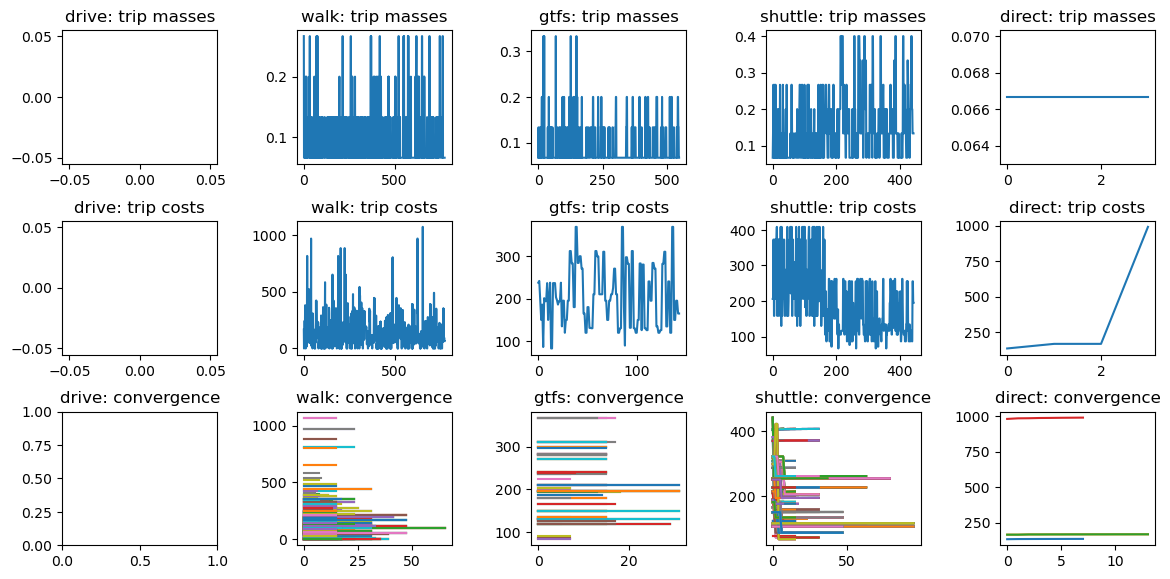

In [37]:
show_edges = False;
show_trips = True;

edgeMasses = {};
edgeCosts = {};
tripCosts = {};
tripMasses = {};
modes = ['drive','gtfs','walk','ondemand']

if show_edges:
    fig1,axs = plt.subplots(3,4,figsize=(12,6));
    fig1.tight_layout(pad=2.0)
    typtoshow = 'current_edge_masses'
    rowind = 0; 
    for m,mode in enumerate(modes):
        edgeMasses[mode] = [];
        for e,edge in enumerate(WORLD[mode][typtoshow]):
            edgeMasses[mode].append(WORLD[mode][typtoshow][edge])
        axs[rowind][m].set_title(mode+': '+typtoshow[8:]);
        axs[rowind][m].plot(edgeMasses[mode])
    
    typtoshow = 'current_edge_costs'
    rowind = 1; rowind2 = 2;
    for m,mode in enumerate(modes):
        edgeCosts[mode] = [];
        for e,edge in enumerate(WORLD[mode][typtoshow]):
            costs = WORLD[mode]['edge_costs'][edge]
            edgeCosts[mode].append(WORLD[mode][typtoshow][edge])
            if np.abs(costs[0]-costs[-1]) > 0.01:
                axs[rowind2][m].plot(costs)
    
        axs[rowind][m].set_title(mode+': '+typtoshow[8:]);
        axs[rowind][m].plot(edgeCosts[mode])


########################################################################################
########################################################################################
print('')
print('')
print('')

toshows = ['drive','walk','gtfs','shuttle','direct']
rowinds = [0,1,2];
if show_trips:
    fig2,axs = plt.subplots(3,len(toshows),figsize=(12,6));
    fig2.tight_layout(pad=2.0)
    
    typtoshow = 'trips'
    # rowind = 0;
    # for m,mode in enumerate(modes):
        
    #     for tt,trip in enumerate(WORLD[mode]['active_trips']):
    #         cost = WORLD[mode]['trips'][trip]['mass']
    #         tripMasses[mode].append(cost)
    
    
    typtoshow = 'trips'
    rowind = 1; rowind2 = 2;
    for m,toshow in enumerate(toshows):
        tripMasses[toshow] = [];
        tripCosts[toshow] = [];
        if toshow == 'shuttle':
            mode = 'ondemand';
            active_trips = WORLD[mode]['active_trips_shuttle'];
        elif toshow == 'direct':
            mode = 'ondemand';
            active_trips = WORLD[mode]['active_trips_direct'];
        else:
            mode = toshow;
            active_trips = WORLD[mode]['active_trips'];

        for tt,trip in enumerate(active_trips):

            tripMasses[toshow].append(WORLD[mode]['trips'][trip]['mass'])
            
            costs = WORLD[mode]['trips'][trip]['costs']['time']
            # if True: #len(costs)<nk:
            # print(costs[-1])
            if len(costs)>0:
                if costs[-1]<1000000000:
                    tripCosts[toshow].append(costs[-1])
                    if True: #np.abs(costs[0]-costs[-1]) > 0.01:
                        axs[rowinds[2]][m].plot(costs)

        axs[rowinds[0]][m].set_title(toshow+': '+'trip masses');
        axs[rowinds[0]][m].plot(tripMasses[toshow])
        
        axs[rowinds[1]][m].set_title(toshow+': '+'trip costs');
        axs[rowinds[1]][m].plot(tripCosts[toshow])

        axs[rowinds[2]][m].set_title(toshow+': '+'convergence');


    
        


#  END OF WORKING #  END OF WORKING #  END OF WORKING # 
#  END OF WORKING #  END OF WORKING #  END OF WORKING # 
#  END OF WORKING #  END OF WORKING #  END OF WORKING # 

# SAVE POPULATION DATA?

In [ ]:

save_pop_data = False;
home_locs = NODES['orig'];
work_locs = NODES['dest'];
if save_pop_data:
    ASDF = {}
    ASDF['home_locs'] = home_locs;
    ASDF['work_locs'] = work_locs;
    ASDF['home_sizes'] = home_sizes;
    ASDF['work_sizes'] = work_sizes;
    ASDF['home_nodes'] = home_nodes;
    ASDF['work_nodes'] = work_nodes;

    fileObj = open('ods10k.obj', 'wb')
    pickle.dump(ASDF,fileObj)
    fileObj.close()

# RECOMPUTE GTFS FEED (takes 2 hrs...)

In [ ]:
recompute = False;
if recompute: 
    asdf = calculateGTFStrips(feed); # SOLVED = 
    fileObj = open('gtfs_trips2.obj', 'wb')
    pickle.dump(SOLVED,fileObj)
    fileObj.close()

# START NEW ---------- 
# TYPE CODE - GRAPH PLOTS

## ----------------- END SANDBOX --------------------END SANDBOX --------------------